In [20]:
"""
model = nn.Sequential( nn.linear(in_features = 3,  out_features = 100),
                      nn.linear(in_features = 100, out_features = 100),
                      nn.ReLU
                      nn.linear(in_features = 3, out_features = 3),)
"""

'\nmodel = nn.Sequential( nn.linear(in_features = 3,  out_features = 100),\n                      nn.linear(in_features = 100, out_features = 100),\n                      nn.ReLU\n                      nn.linear(in_features = 3, out_features = 3),)\n'

## 62 ARCHITECTURE OF CLASIFICATION NEURAL NETWORKS
classification typenetworks:  https://www.learnpytorch.io/02_pytorch_classification/   
**BINARY** . . . . . . . . Target can be one of two options (1)  yes (0) no

**MULTI-CLASS** . . .Target can be clasified as one of many than two options

**MULTI-LABEL** . . .	Target can be assigned more than one categories 

a clasification problem has one output for every posible result
where activation (1) is it belongs to that group (0) it does not   
## we use "SCIKIT-LEARN" data analysis. . . https://scikit-learn.org/stable/

In [21]:
import sklearn 
from sklearn.datasets  import make_circles

# make1000 samples
n_samples = 1000

# create 2 circles
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [22]:
print(len(X),  len(y))
print(f"first 5 samples x:{X[:5]}")  # shape [1000,2]
print(f"first 5 samples y:{y[:5]}")  # shape [1000,1]
y

1000 1000
first 5 samples x:[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 samples y:[1 1 1 1 0]


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [23]:
import pandas as pd
circles = pd.DataFrame({"x1":X[:,0],
                        "x2":X[:,1],
                        "label":y})
circles.head(10)

,x1,x2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


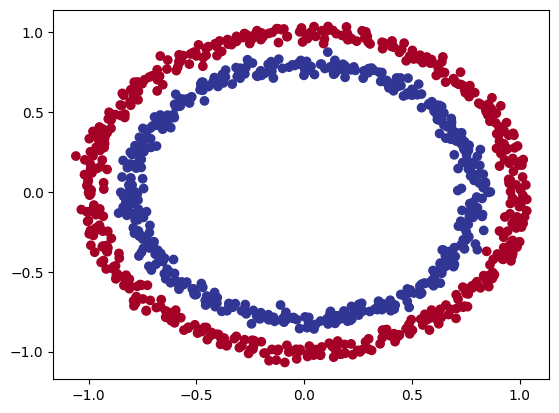

In [24]:
#cisualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

**Note** :  this is refered as toy dataset  https://scikit-learn.org/stable/datasets/toy_dataset.html  
small enought to experiment but sizable enought to practice fundamentals. 

1.1 Check input output shapes

In [25]:
X.shape, y.shape

((1000, 2), (1000,))

In [26]:
#view fist example of features and labels
X_sample = X[0] # first features
y_sample = y[0] # first label
print(f"Values for one sample of X:{X_sample} the same for y:{y_sample}")
print(f"shapes for one sample of X:{X_sample.shape} the same for y:{y_sample.shape}")

Values for one sample of X:[0.75424625 0.23148074] the same for y:1
shapes for one sample of X:(2,) the same for y:()


1.2 Turn data into tensor & split: train/test 

In [27]:
import torch      # 1.10at least
torch.__version__ # 2.0+cu118

'2.0.0+cu118'

In [28]:
print(type(X))    # class 'numpy.ndarray'
X = torch.from_numpy(X).type(torch.float) # if you run 1st time it converts data
y = torch.from_numpy(y).type(torch.float) # if you run 2nd time it shows ERROR
X[:5],y[:5]                               # ndarray  expected got Tensor

<class 'numpy.ndarray'>


(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [29]:
type(X), X.dtype,y.dtype

(torch.Tensor, torch.float32, torch.float32)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html 

In [30]:
# SPLIT DATA   TRAIN/TEST
from sklearn.model_selection import train_test_split
# X = Data (in)  Y= labels (out)
X_train, X_test, y_train,y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2,  # 80% TRAIN
                                                   random_state=42) # SEED = 42

In [31]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

## 65  STEPS FOR MODELING & AGNOSTIC DEVIDE  9:21:40   
build a model to clasify blue & red dots  

1 Setup device agnostic  
2 construct model  
3 Define loss function 7 optimizer  
4 create train/testloop 

In [32]:
#build a model
import torch 
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

create a model that :  
1 subclass nn.Module  - As most models in torch do)  
2 create 2 :  nn.Linear() - Layers capable of handling the shape of our data  
3 define forward() - Method that outlines the forward pass computation  
4 instantiate an instance of our model and send to target device 

In [33]:
# 1 subclass nn.Module  - As most models in torch do)  
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2 create 2 :  nn.Linear() - Layers capable of handling the shape of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # 2->5 upscales input to (5 out neurons)
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes 5 inputs (outs 1 neuron)
  # 3 define forward() - Method that outlines the forward pass computation  
  def forward(seld,x):
    return self.layer_2(self.layer_1(x))  # x ->  Layer1 -> Layer2 -> output

# 4 instantiate an instance of our model and send to target device 
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [34]:
# EASY MODE....
# replicating the same model but with nn.sequencal
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [35]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

In [36]:
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

print(f"Predictions:{ untrained_preds.shape} Samples:{ X_test.shape}" )
print(f"Samples:{X_test[:10]}  Labels:{y_test[:10]} Predictions:{untrained_preds[:10]}"    )


Predictions:torch.Size([200, 1]) Samples:torch.Size([200, 2])
Samples:tensor([[-0.3752,  0.6827],
        [ 0.0154,  0.9600],
        [-0.7028, -0.3147],
        [-0.2853,  0.9664],
        [ 0.4024, -0.7438],
        [ 0.6323, -0.5711],
        [ 0.8561,  0.5499],
        [ 1.0034,  0.1903],
        [-0.7489, -0.2951],
        [ 0.0538,  0.9739]])  Labels:tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]) Predictions:tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]])


## 67 MAKING OUR NEURAL NETWORK VISUAL 9:37:00

https://playground.tensorflow.org/


## 69 SETING UP LOSS OPTIMIZER & EVALUATION 9:57:16

BinaryCrossEntropy: https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html  
https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a  

CategoricalCrossEntropy: https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html  
https://towardsdatascience.com/cross-entropy-loss-function-f38c4ec8643e#:~:text=Categorical%20cross%2Dentropy%20is%20used,%5D%20for%203%2Dclass%20problem.

Acuracy https://www.google.com/search?q=formula+for+accuracy+in+confusion+matrix

### 2.1 set up LOSS & OPTIMIZER function 
* For regression we can use MeanAverageError or MeanSquareError(MSE)  loss functions  
* For clasification we  use BinaryCrossEntropy(BCE) or CategoricalCrossEntropy(CCE) loss functions  
* common optimizers : StochasticGradientDescent(SGD) or Addam  
we will use nn.BECWitLogitsLoss  wich is BCE with Sigmoid Activation function built in but is more stable than BCELoss+Sigmoid 10:08:30

In [37]:
""" (LESS STABLE)
nn.Sequential(
    nn.Sigmoid(),
    nn.BCELoss())
"""
loss_fn   = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.1) # learning ratte


In [38]:
# calculate accuracy (confusion-matrix) %cfor our predictions  (to use with LOSS)
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

## 70 MODEL TO LOGITS TO PREDICTION TO LABELS 10:12:13

In [39]:
# training our model
# 1 forard pass
# 2 calc loss
# 3 zero grad
# 4 backprop loss
# 5 setp optimizer

### 3.1 going from logits -> prediction probabilities -> prediction labels  
Model outputs = raw logits   
We convert them to probabilities passing it to the Activation function.  
Then we convert to prediction labels by rounding or taking th argmax()  10:18:11

In [40]:
# forward() output and tstt data aro not same format
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits  

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]])

In [41]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [42]:
# use sigmoid activation funtion (output activation)  on our model logits
# to turn it into probabilities
y_pred_probs = torch.sigmoid(y_logits)

In [43]:
#Find tthe predicted labels
y_preds = torch.round(y_pred_probs)

#in full (mede predictions with model)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5] ))

#in 1 line
print(torch.eq( y_preds[:5].squeeze() ,y_pred_labels.squeeze()  ))

y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 1., 0., 1.])

In [44]:
print(y_test[:5])
print(device)
!nvidia-smi

tensor([1., 0., 1., 0., 1.])
cpu
/bin/bash: nvidia-smi: command not found


https://pytorch.org/docs/stable/generated/torch.cuda.seed.html

## 71 CODING TRAINING & TESTING OPTTIMIZATION LOOP 10:28:15

In [45]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

X_train , y_train = X_train.to(device) , y_train.to(device)
X_test  , y_test  = X_test.to(device)  , y_test.to(device)

################################## TRAINING LOOP
for epoch in range(epochs):
  model_0.train()
  # 1forward() pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2 calculate loss (accuracy) 
  '''loss = loss_fn(torch.sigmoid(y_logits),  # nn.BCELoss expects probabilities
                 y_train)''' 
  loss = loss_fn(y_logits,  # nn.BCEWithLogits
                 y_train)
  acc = accuracy_fn(y_true = y_train, # OUR CUSTOM ACCURACY METRIC FUNCTION
                   y_pred = y_pred)  # same arg ordeer as scikit-learn 10:41:20
  
  #  3 optimize zero grad 
  optimizer.zero_grad()
  #  4 loss backward (backprop)
  loss.backward()
  # 5 optimizer step (grad descent)
  optimizer.step()

##################################  TESTING LOOP

  model_0.eval()
  with torch.inference_mode():
    # forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # calculate test loss
    test_loss = loss_fn(test_logits,  # nn.BCEWithLogits
                      y_test  )
    test_acc = accuracy_fn(y_true=y_test,
                         y_pred=test_pred)
    # print the learn process
    if epoch %10 == 0:
      print(f"Epoch:{epoch} | Loss:{loss:.5f} |Accuracy:{acc:.2f} | TestLoss:{test_loss:.5f} |Test Acc:{test_acc:.2f}")

Epoch:0 | Loss:0.69796 |Accuracy:51.88 | TestLoss:0.69440 |Test Acc:58.00
Epoch:10 | Loss:0.69590 |Accuracy:51.25 | TestLoss:0.69305 |Test Acc:53.00
Epoch:20 | Loss:0.69490 |Accuracy:51.62 | TestLoss:0.69254 |Test Acc:49.50
Epoch:30 | Loss:0.69435 |Accuracy:51.12 | TestLoss:0.69236 |Test Acc:49.50
Epoch:40 | Loss:0.69401 |Accuracy:50.88 | TestLoss:0.69232 |Test Acc:51.00
Epoch:50 | Loss:0.69378 |Accuracy:50.25 | TestLoss:0.69234 |Test Acc:50.00
Epoch:60 | Loss:0.69362 |Accuracy:50.00 | TestLoss:0.69239 |Test Acc:51.50
Epoch:70 | Loss:0.69351 |Accuracy:50.25 | TestLoss:0.69246 |Test Acc:51.00
Epoch:80 | Loss:0.69342 |Accuracy:49.88 | TestLoss:0.69254 |Test Acc:50.00
Epoch:90 | Loss:0.69336 |Accuracy:49.88 | TestLoss:0.69262 |Test Acc:53.00


## 72 WRITING CODE TO DOWNLOAD A HEPER FUNCTON 10:43:41

OUR MODEL IS NOT LEARNING LETS VISUALIZE WHY
using requests  
https://github.com/mrdbourke/tensorflow-deep-learning  
https://github.com/mrdbourke/pytorch-deep-learning/blob/main/02_pytorch_classification.ipynb  
https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py

In [46]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

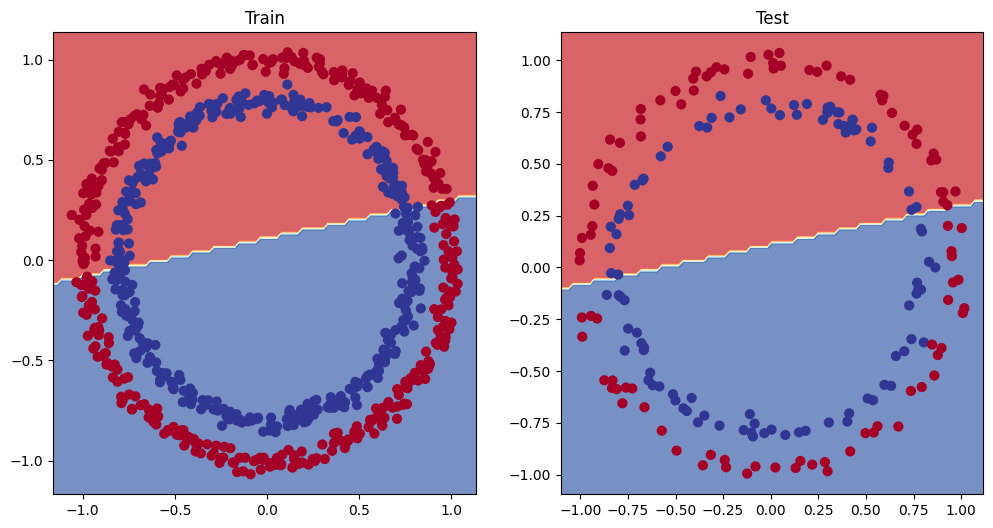

In [47]:
# 10:54:30  Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) ###  START OF 1ST PLOT
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2) ###  START OF 2ND PLOT
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## IMPROVING OUR MODEL (LINEAR AINT WORKING)
► Add more layers . . . . . . . . . . . .  ► Add more hidden units  
► Fitting for longer (more epochs) .  .► Change the learning rate	
► Changing the activation functions	 ► Change the loss function	 
► Use transfer learning	
Take a pretrained model from a problem domain similar to yours and adjust it to your own problem. We cover transfer learning in notebook 06.

One way to troubleshout is starting with a smaller problem
we wul change the model adding 10 neurons and in 2 hidden layers and train for a line


In [48]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        
    def forward(self, x): # note: always make sure forward is spelt correctly!
        # Creating a model like this is the same as below, though below
        # generally benefits from speedups where possible.
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [49]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [50]:
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression), 
    len(y_train_regression), 
    len(X_test_regression), 
    len(y_test_regression))

80 80 20 20


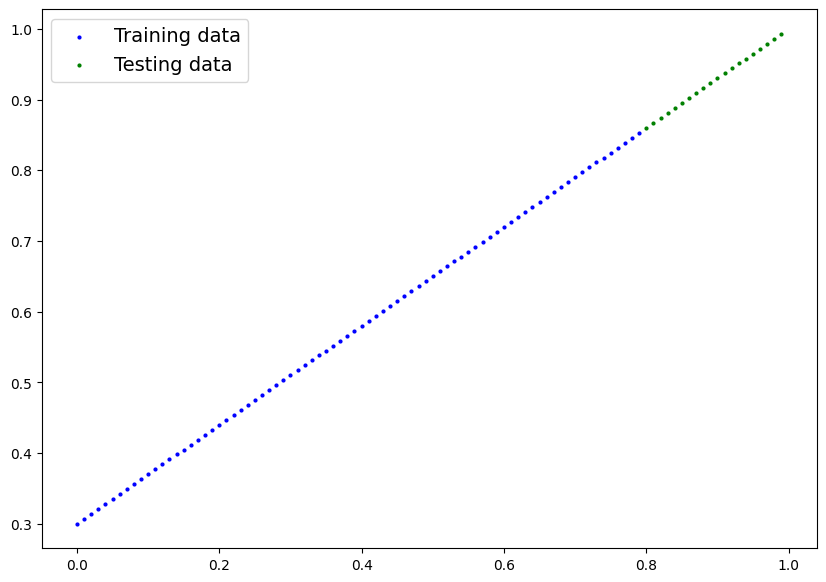

In [51]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);

In [52]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=1, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        
    def forward(self, x): # note: always make sure forward is spelt correctly!

        return self.layer_3(self.layer_2(self.layer_1(x)))

model_2 = CircleModelV1().to(device)
model_2

CircleModelV1(
  (layer_1): Linear(in_features=1, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [53]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)

In [54]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)


# Set the number of epochs
epochs = 1000

# Put data to target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    ### Training 
    # 1. Forward pass
    y_pred = model_2(X_train_regression)
    # 2. Calculate loss (no accuracy since it's a regression problem, not classification)
    loss = loss_fn(y_pred, y_train_regression)
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    # 4. Loss backwards
    loss.backward()
    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model_2(X_test_regression)
      # 2. Calculate the loss 
      test_loss = loss_fn(test_pred, y_test_regression)

    # Print out what's happening
    if epoch % 100 == 0: 
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.57896, Test loss: 0.82273
Epoch: 100 | Train loss: 0.03496, Test loss: 0.00156
Epoch: 200 | Train loss: 0.03268, Test loss: 0.00330
Epoch: 300 | Train loss: 0.02942, Test loss: 0.00446
Epoch: 400 | Train loss: 0.02731, Test loss: 0.00570
Epoch: 500 | Train loss: 0.02672, Test loss: 0.00534
Epoch: 600 | Train loss: 0.02627, Test loss: 0.00511
Epoch: 700 | Train loss: 0.02594, Test loss: 0.00496
Epoch: 800 | Train loss: 0.02482, Test loss: 0.00394
Epoch: 900 | Train loss: 0.02333, Test loss: 0.00462


## 78 EVALUATING MODELS PREDICTIONS ON STRAIGT LINE DATA 11:47:55

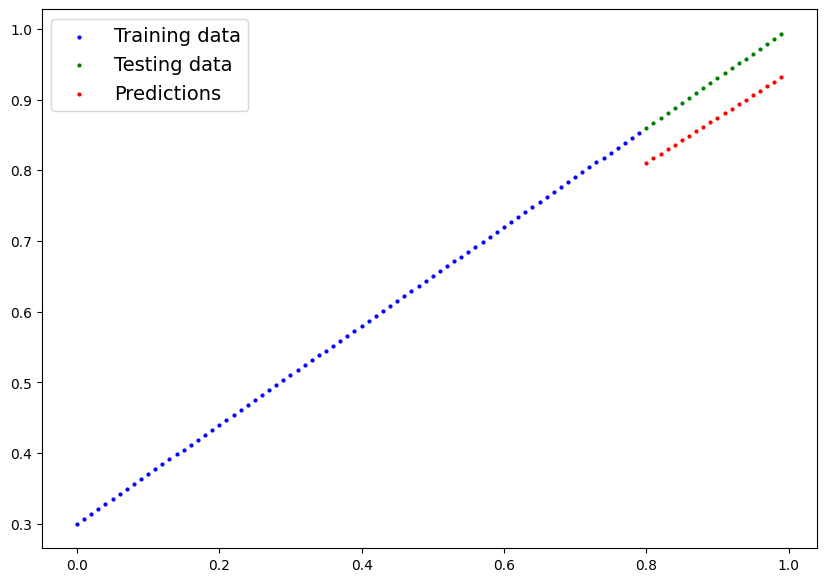

In [55]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

## 79 11:51:28 NON-LINEARITY
https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity  
https://pytorch.org/docs/stable/nn.html#non-linear-activations-other

### 6.0 The missing piece: non-linearity
We've seen our model can draw straight (linear) lines, thanks to its linear layers.

But how about we give it the capacity to draw non-straight (non-linear) lines?

How?

Let's find out.


### 6.1 Recreating non-linear data (red and blue circles)
First, let's recreate the data to start off fresh. We'll use the same setup as before.

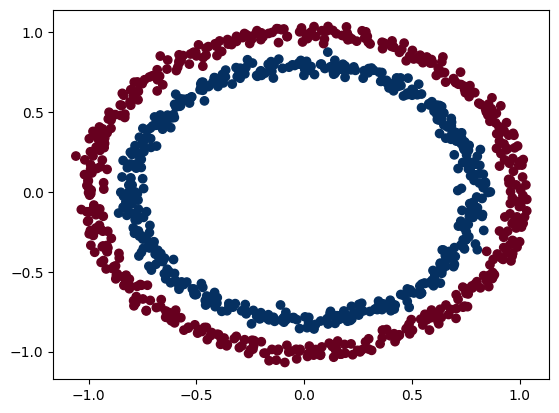

In [56]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [57]:
# Convert to tensors and split into train and test sets
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42
)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

###6.2 Building a model with non-linearity  
Now here comes the fun part.  

What kind of pattern do you think you could draw with unlimited straight (linear) and non-straight (non-linear) lines?  

I bet you could get pretty creative.  

So far our neural networks have only been using linear (straight) line functions.  

But the data we've been working with is   non-linear (circles).

PyTorch has a bunch of ready-made non-linear activation functions that do similiar but different things.

One of the most common and best performing is [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks) (rectified linear-unit, torch.nn.ReLU()).

In [58]:
# Build model with non-linear activation function
torch.manual_seed(42)
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        innher = 5
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=innher)
       # self.layer_2 = nn.Linear(in_features=innher, out_features=innher)
        self.layer_3 = nn.Linear(in_features=innher, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model 
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
      # return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
       return self.layer_3(self.relu( self.layer_1(x) ) )

model_3 = CircleModelV2().to(device)
print(model_3)
print(model_3.state_dict())

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_3): Linear(in_features=5, out_features=1, bias=True)
  (relu): ReLU()
)
OrderedDict([('layer_1.weight', tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427],
        [-0.3443,  0.4153],
        [ 0.6233, -0.5188]])), ('layer_1.bias', tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410])), ('layer_3.weight', tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]])), ('layer_3.bias', tensor([-0.2060]))])


In [59]:
# Setup loss and optimizer 
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.5)

In [60]:
######### TRAIN (Fit the model to data)
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

######## Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

######## Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")
print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69753, Accuracy: 50.00% | Test Loss: 0.69790, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.68472, Accuracy: 54.00% | Test Loss: 0.68128, Test Accuracy: 63.00%
Epoch: 200 | Loss: 0.67030, Accuracy: 56.00% | Test Loss: 0.66353, Test Accuracy: 62.00%
Epoch: 300 | Loss: 0.62082, Accuracy: 76.62% | Test Loss: 0.62489, Test Accuracy: 76.50%
Epoch: 400 | Loss: 0.50987, Accuracy: 93.75% | Test Loss: 0.52190, Test Accuracy: 92.50%
Epoch: 500 | Loss: 0.37255, Accuracy: 95.62% | Test Loss: 0.38712, Test Accuracy: 95.00%
Epoch: 600 | Loss: 0.51659, Accuracy: 68.12% | Test Loss: 0.53921, Test Accuracy: 65.50%
Epoch: 700 | Loss: 0.50269, Accuracy: 69.12% | Test Loss: 0.52620, Test Accuracy: 67.50%
Epoch: 800 | Loss: 0.49180, Accuracy: 69.75% | Test Loss: 0.51651, Test Accuracy: 68.50%
Epoch: 900 | Loss: 0.47610, Accuracy: 70.50% | Test Loss: 0.50017, Test Accuracy: 71.50%
Epoch: 999 | Loss: 0.48836, Accuracy: 71.88% | Test Loss: 0.51096, Test Accuracy: 74.00%


### 6.4 Evaluating a model trained with non-linear activation functions
Remember how our circle data is non-linear? Well, let's see how our models predictions look now the model's been trained with non-linear activation functions.

In [61]:
# Make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y[:10] # want preds in same format as truth labels

(tensor([1., 1., 1., 1., 1., 1., 0., 0., 1., 1.]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

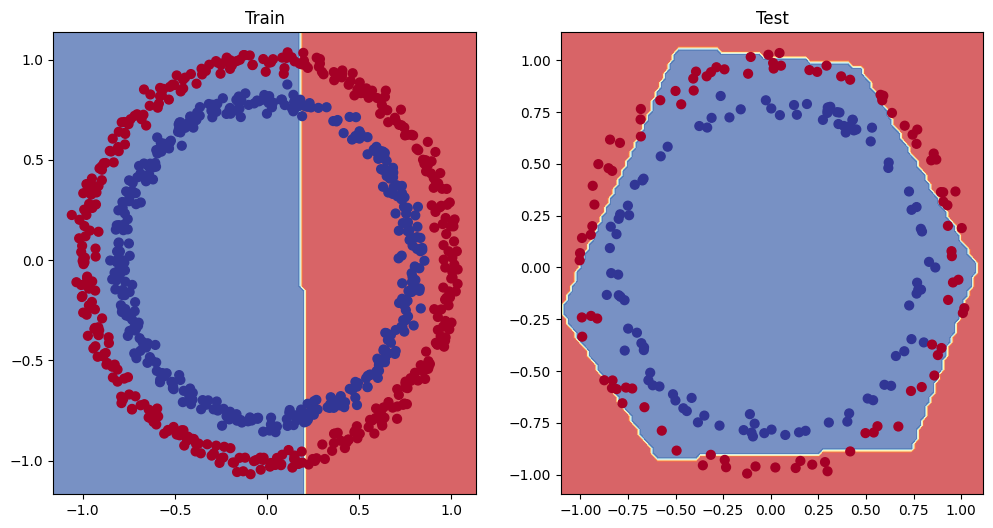

In [62]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

In [63]:
print(model_3.state_dict())

OrderedDict([('layer_1.weight', tensor([[ 4.6828,  2.9673],
        [-0.0437,  0.3049],
        [ 0.3720,  0.1313],
        [-4.2986,  2.4149],
        [ 0.4877, -5.0336]])), ('layer_1.bias', tensor([-0.8830,  0.6879,  2.7373, -0.3431, -0.5196])), ('layer_3.weight', tensor([[-3.4521,  0.6830,  2.7398, -3.1458, -3.2208]])), ('layer_3.bias', tensor([5.5132]))])


## 83 7 : REPLICATIONG NON LINEAR ACTIVATION 12:32:58 

We saw before how adding non-linear activation functions to our model can helped it to model non-linear data.

Note: Much of the data you'll encounter in the wild is non-linear (or a combination of linear and non-linear). Right now we've been working with dots on a 2D plot. But imagine if you had images of plants you'd like to classify, there's a lot of different plant shapes. Or text from Wikipedia you'd like to summarize, there's lots of different ways words can be put together (linear and non-linear patterns).

In [64]:
# Create a toy tensor (similar to the data going into our model(s))
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

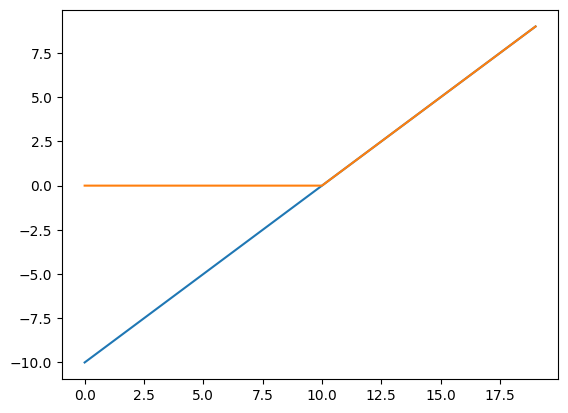

In [65]:
# Create a toy tensor (similar to the data going into our model(s))
A = torch.arange(-10, 10, 1, dtype=torch.float32)
# Visualize the toy tensor
plt.plot(A);
# Plot ReLU activated toy tensor
plt.plot(torch.relu(A));

In [66]:
# Create ReLU function by hand 
def relu(x):
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors

# Pass toy tensor through ReLU function
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

In [67]:
# Create Sigmoid function by hand 
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

# Test custom sigmoid on toy tensor
sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

In [68]:
# Create Sigmoid function by hand 
def atan(x):
  return torch.atan(x)

# Test custom sigmoid on toy tensor
atan(A)

tensor([-1.4711, -1.4601, -1.4464, -1.4289, -1.4056, -1.3734, -1.3258, -1.2490,
        -1.1071, -0.7854,  0.0000,  0.7854,  1.1071,  1.2490,  1.3258,  1.3734,
         1.4056,  1.4289,  1.4464,  1.4601])

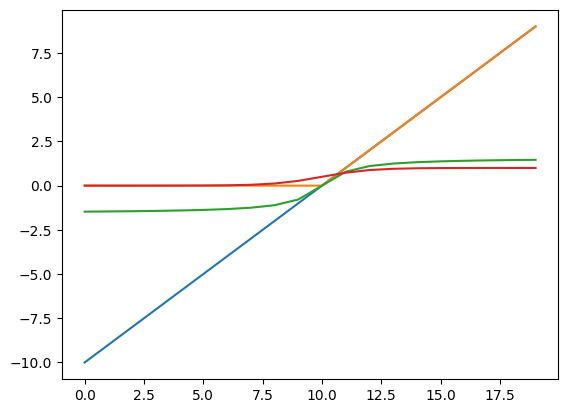

In [69]:
# Plot ReLU activated toy tensor
plt.plot(A);
plt.plot(relu(A));
plt.plot(atan(A));
plt.plot(sigmoid(A));

## 81 . . . 12:42:40 
8. Putting things together by building a multi-class PyTorch model
We've covered a fair bit.

But now let's put it all together using a multi-class classification problem.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


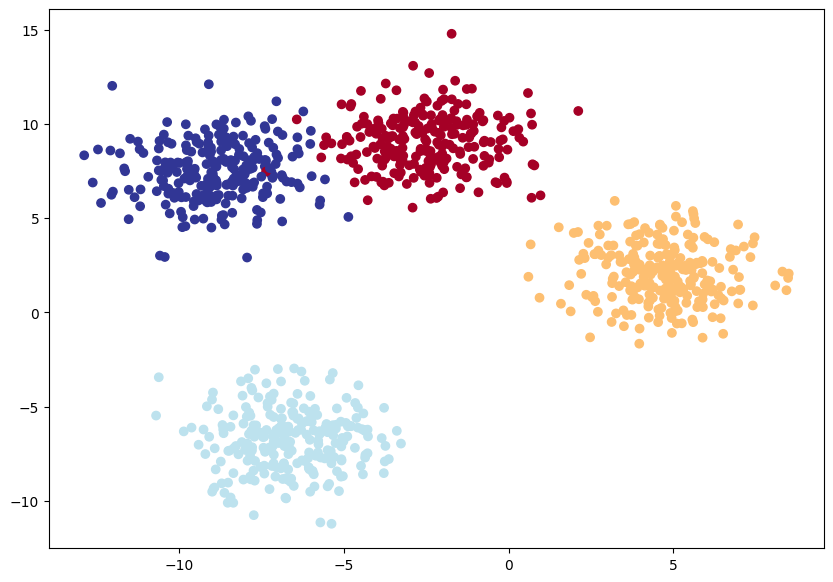

In [70]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data  & MODEL creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels 
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [71]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [72]:
from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )
    
    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES, 
                    output_features=NUM_CLASSES, 
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

## 86  PUTTING ALL TOGUETHER PART_3 13:06:25
8.3 Creating a loss function and optimizer for a multi-class PyTorch model
Since we're working on a multi-class classification problem, we'll use :  
## nn.CrossEntropyLoss() method  as our loss function.
And we'll stick with using SGD with a learning rate of 0.1 for optimizing our model_4 parameters.

In [73]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
# optimizer updates our model parameters
optimizer = torch.optim.SGD(model_4.parameters(), 
                            lr=0.1) # exercise: try changing the learning rate here and seeing what happens to the model's performance

8.4 Getting prediction probabilities for a multi-class PyTorch model
Alright, we've got a loss function and optimizer ready, and we're ready to train our model but before we do let's do a single forward pass with our model to see if it works.

In [74]:
# Perform a single forward pass on the data (we'll need to put it to the target device for it to work)
model_4(X_blob_train.to(device))[:5]

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804]], grad_fn=<SliceBackward0>)

In [75]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940]])

In [76]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train) # model outputs raw logits 
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train) 
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%") 

Epoch: 0 | Loss: 1.04324, Acc: 65.50% | Test Loss: 0.57861, Test Acc: 95.50%
Epoch: 10 | Loss: 0.14398, Acc: 99.12% | Test Loss: 0.13037, Test Acc: 99.00%
Epoch: 20 | Loss: 0.08062, Acc: 99.12% | Test Loss: 0.07216, Test Acc: 99.50%
Epoch: 30 | Loss: 0.05924, Acc: 99.12% | Test Loss: 0.05133, Test Acc: 99.50%
Epoch: 40 | Loss: 0.04892, Acc: 99.00% | Test Loss: 0.04098, Test Acc: 99.50%
Epoch: 50 | Loss: 0.04295, Acc: 99.00% | Test Loss: 0.03486, Test Acc: 99.50%
Epoch: 60 | Loss: 0.03910, Acc: 99.00% | Test Loss: 0.03083, Test Acc: 99.50%
Epoch: 70 | Loss: 0.03643, Acc: 99.00% | Test Loss: 0.02799, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03448, Acc: 99.00% | Test Loss: 0.02587, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03300, Acc: 99.12% | Test Loss: 0.02423, Test Acc: 99.50%


In [78]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 0, 2, 2, 0, 0, 0, 1, 3, 0])
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])


RuntimeError: ignored

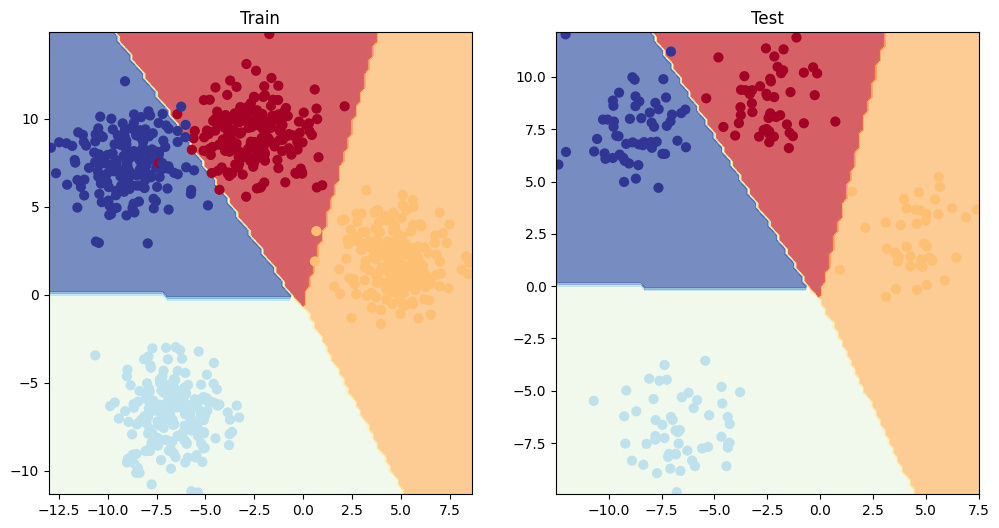

In [79]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)